In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
set(y_true)

{np.int64(0), np.int64(1), np.int64(2)}

In [10]:
fig = px.scatter_matrix(X, dimensions=X.columns,
                        color=pd.Categorical(y_true),
                        title="Iris Feature Pairplot (True Labels)")
fig.update_traces(diagonal_visible=False)
fig.show()

In [13]:
linkage_matrix = linkage(X_scaled, method='ward')

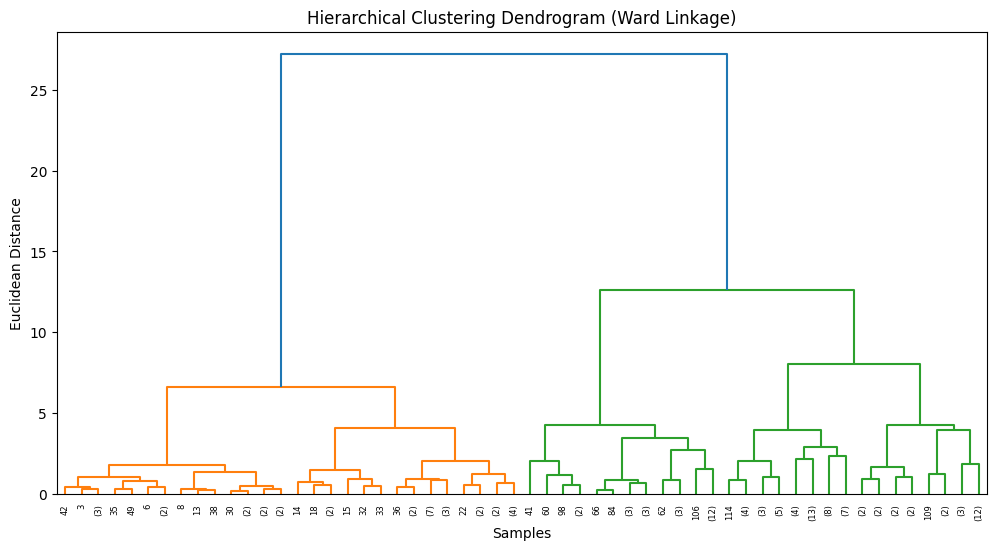

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.show()

In [16]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

In [17]:
df_clusters = pd.DataFrame(X_scaled, columns=['Feature1','Feature2','Feature3','Feature4'])
df_clusters['Cluster'] = y_hc.astype(str)

fig = px.scatter_3d(df_clusters, x='Feature1', y='Feature2', z='Feature3',
                    color='Cluster', title='Hierarchical Clustering (3D Visualization)')
fig.show()

fig2 = px.scatter(df_clusters, x='Feature1', y='Feature2', color='Cluster',
                  title='Hierarchical Clustering (2D Projection)')
fig2.show()